<a href="https://colab.research.google.com/github/Hashhhhhhhh/HOM-interference-results-for-different-cases/blob/main/HOM_dip_for_different_wavepacket_shapes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

What is HOM dip?

 The HOM effect can be seen when measuring the joint detection probability($p_{c}$) of two detectors registering a photon pair, which can be generated in a process
 such as SPDC described above. By letting the pair interfere on a 50/50 BS and
 varying the difference in optical path length one can observe a sharp decline in $p_{c}$. Alternatively, a similar dip can be seen by varying the crystal temperature
 in the photon-pair generation setup. This phenomenon is called the HOM dip.

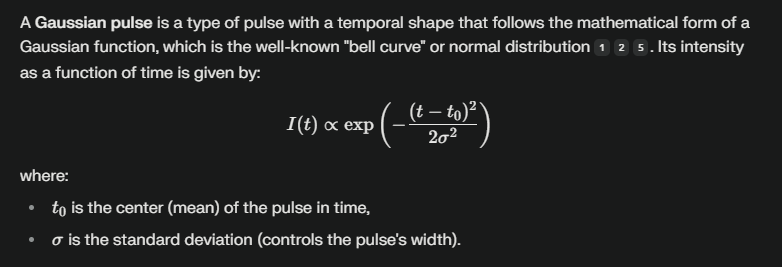

The pulse rises smoothly from zero, reaches a peak at $t_{0}$ and then decays symmetrically back to zero, forming a bell-shaped curve.

Here, By changing delay, we shift the pulse left or right in time. This models when a photon or wavepacket arrives.
If delay = 0, the pulse is centered at t=0

If delay = 5 $\times$ 10^{-15}, the pulse is centered at t=5 femtoseconds.

For the wavefunction normalization:
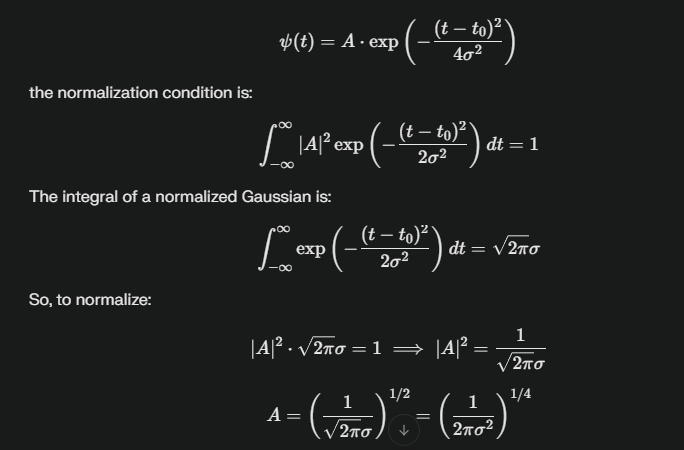

In [2]:
#initializing
#pulse width in secs :
sigma = 50e-15 #controls the width of the pulse
#Gaussian photon temporal wavepacket
def photon_wavepacket(t, delay=0):
    # Normalization so that the integral of |psi(t)|^2 dt = 1
    norm = (1/(2 * np.pi * sigma**2))**0.25
    return norm * np.exp(-(t - delay)**2 / (4 * sigma**2))

In [3]:
#Computing overapping integral (to observe overlapping effects)
def overlap_integral(t, delay):
    psi1 = photon_wavepacket(t, delay=0)
    psi2 = photon_wavepacket(t, delay=delay)
    integral = np.conj(psi1) * psi2
    # magnitude of quantum overlap: |<psi1|psi2>|^2
    return np.abs(np.trapz(integral, t))**2

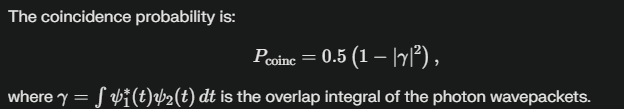

In [4]:
#Computing HOM coincidence probability
# Coincidence probability as a function of delay
def hom_coincidence_probability(delay_array, t):
    probs = []
    for delay in delay_array:
        overlap = overlap_integral(t, delay)
        prob = 0.5 * (1 - overlap)
        probs.append(prob)
    return np.array(probs)

<ipython-input-3-fc96d56b30e0>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.abs(np.trapz(integral, t))**2


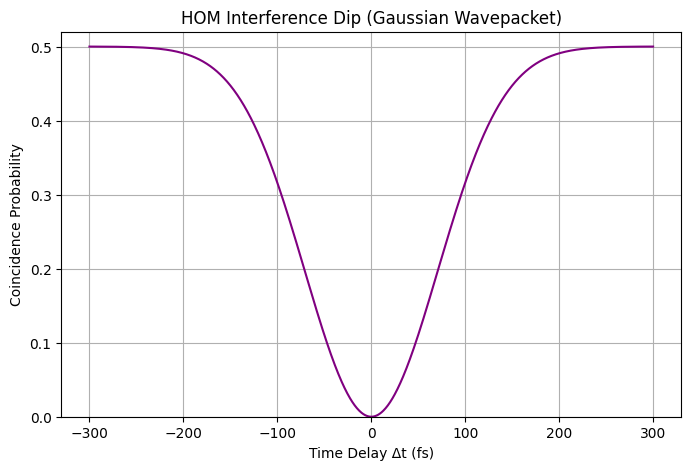

In [5]:
# Time array to define the wavepackets
t = np.linspace(-300e-15, 300e-15, 1000)  # time range in seconds

# Delay range for HOM dip
delays = np.linspace(-300e-15, 300e-15, 1000)

# Get coincidence probabilities
coinc_probs = hom_coincidence_probability(delays, t)
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(delays * 1e15, coinc_probs, color='purple')
ax.set_title("HOM Interference Dip (Gaussian Wavepacket)")
ax.set_xlabel("Time Delay Δt (fs)")
ax.set_ylabel("Coincidence Probability")
ax.grid(True)
ax.set_ylim(0, 0.52)
plt.show()



Here, the dip is at $\Delta$t =0, because that's when interference is maximal.
The photon are maximally indistinguishable. The photons become distinguishable due to delay. Interference fades, photons behave independently. Coincidence rate rises to the classical level (50%).

Now, considering for a different shape of the wavepacket.

LORENTZIAN DISTRIBUTION:

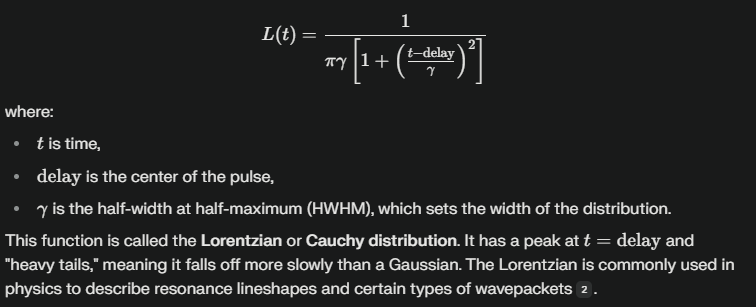

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 3e8  # speed of light (not used here)
gamma = 50e-15  # Lorentzian pulse width (HWHM) in seconds

# Normalized Lorentzian photon temporal wavepacket
def photon_wavepacket(t, delay=0, gamma=gamma):
    # Raw Lorentzian
    wave = 1 / (np.pi * gamma * (1 + ((t - delay)/gamma)**2))
    # Numerical normalization over the finite time window
    norm = np.sqrt(np.trapz(np.abs(wave)**2, t))
    return wave / norm

# Overlap integral
def overlap_integral(t, delay):
    psi1 = photon_wavepacket(t, delay=0)
    psi2 = photon_wavepacket(t, delay=delay)
    integrand = np.conj(psi1) * psi2
    return np.abs(np.trapz(integrand, t))**2  # |<psi1|psi2>|^2

# Coincidence probability as a function of delay
def hom_coincidence_probability(delay_array, t):
    probs = []
    for delay in delay_array:
        overlap = overlap_integral(t, delay)
        prob = 0.5 * (1 - overlap)
        probs.append(prob)
    return np.array(probs)

# Time array to define the wavepackets
t = np.linspace(-300e-15, 300e-15, 2000)  # time range in seconds

# Delay range for HOM dip
delays = np.linspace(-300e-15, 300e-15, 1000)

# Get coincidence probabilities
coinc_probs = hom_coincidence_probability(delays, t)

# Plot the HOM dip
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(delays * 1e15, coinc_probs, color='teal')
ax.set_title("HOM Interference Dip (Lorentzian Wavepacket)")
ax.set_xlabel("Time Delay Δt (fs)")
ax.set_ylabel("Coincidence Probability")
ax.grid(True)
ax.set_ylim(0, 0.52)
plt.show()


<ipython-input-6-5c287eb16ff2>:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  norm = np.sqrt(np.trapz(np.abs(wave)**2, t))
<ipython-input-6-5c287eb16ff2>:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.abs(np.trapz(integrand, t))**2  # |<psi1|psi2>|^2


EXPONENTIAL DISTRIBUTION:

 For a single-sided exponential (decaying for t≥ delay), the normalized wavepacket is:

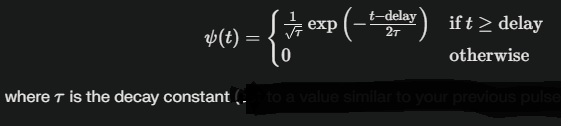

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
tau = 50e-15  # Exponential decay constant in seconds

# Exponential photon temporal wavepacket (single-sided)
def photon_wavepacket(t, delay=0, tau=tau):
    # Only defined for t >= delay
    psi = np.zeros_like(t)
    mask = t >= delay
    psi[mask] = (1/np.sqrt(tau)) * np.exp(-(t[mask] - delay)/(2*tau))
    return psi

# Overlap integral
def overlap_integral(t, delay):
    psi1 = photon_wavepacket(t, delay=0)
    psi2 = photon_wavepacket(t, delay=delay)
    integrand = np.conj(psi1) * psi2
    return np.abs(np.trapz(integrand, t))**2  # |<psi1|psi2>|^2

# Coincidence probability as a function of delay
def hom_coincidence_probability(delay_array, t):
    probs = []
    for delay in delay_array:
        overlap = overlap_integral(t, delay)
        prob = 0.5 * (1 - overlap)
        probs.append(prob)
    return np.array(probs)

# Time array to define the wavepackets
t = np.linspace(-300e-15, 300e-15, 2000)  # time range in seconds

# Delay range for HOM dip
delays = np.linspace(-300e-15, 300e-15, 1000)

# Get coincidence probabilities
coinc_probs = hom_coincidence_probability(delays, t)

# Plot the HOM dip
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(delays * 1e15, coinc_probs, color='orange')
ax.set_title("HOM Interference Dip (Exponential Wavepacket)")
ax.set_xlabel("Time Delay Δt (fs)")
ax.set_ylabel("Coincidence Probability")
ax.grid(True)
ax.set_ylim(0, 0.52)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
width = 100e-15  # 100 fs

def photon_wavepacket(t, delay=0, width=width):
    psi = np.zeros_like(t)
    mask = np.abs(t - delay) <= width / 2
    psi[mask] = 1 / np.sqrt(width)
    return psi

# Overlap integral
def overlap_integral(t, delay):
    psi1 = photon_wavepacket(t, delay=0)
    psi2 = photon_wavepacket(t, delay=delay)
    integrand = np.conj(psi1) * psi2
    return np.abs(np.trapz(integrand, t))**2

# Coincidence probability as a function of delay
def hom_coincidence_probability(delay_array, t):
    probs = []
    for delay in delay_array:
        overlap = overlap_integral(t, delay)
        prob = 0.5 * (1 - overlap)
        probs.append(prob)
    return np.array(probs)

# Time array to define the wavepackets
t = np.linspace(-300e-15, 300e-15, 2000)  # time range in seconds

# Delay range for HOM dip
delays = np.linspace(-300e-15, 300e-15, 1000)

# Get coincidence probabilities
coinc_probs = hom_coincidence_probability(delays, t)

# Plot the HOM dip
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(delays * 1e15, coinc_probs, color='pink')
ax.set_title("HOM Interference Dip (Rectangular Wavepacket)")
ax.set_xlabel("Time Delay Δt (fs)")
ax.set_ylabel("Coincidence Probability")
ax.grid(True)
ax.set_ylim(0, 0.52)
plt.show()
